# K-means and K-medoids Clustering Algorithms

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

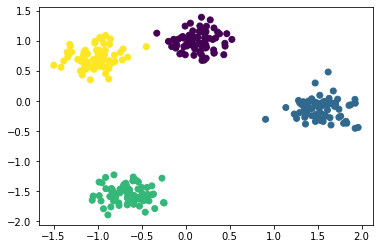

In [4]:
# Generate a synthetic dataset with 300 samples and 2 features
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])

#visualize the data
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=data[1])
plt.show()

In [5]:
def initialize_clusters(points, k):
    return points[np.random.randint(points.shape[0], size=k)]

In [24]:
help(np.linalg.norm)

Help on function norm in module numpy.linalg:

norm(x, ord=None, axis=None, keepdims=False)
    Matrix or vector norm.
    
    This function is able to return one of eight different matrix norms,
    or one of an infinite number of vector norms (described below), depending
    on the value of the ``ord`` parameter.
    
    Parameters
    ----------
    x : array_like
        Input array.  If `axis` is None, `x` must be 1-D or 2-D, unless `ord`
        is None. If both `axis` and `ord` are None, the 2-norm of
        ``x.ravel`` will be returned.
    ord : {non-zero int, inf, -inf, 'fro', 'nuc'}, optional
        Order of the norm (see table under ``Notes``). inf means numpy's
        `inf` object. The default is None.
    axis : {None, int, 2-tuple of ints}, optional.
        If `axis` is an integer, it specifies the axis of `x` along which to
        compute the vector norms.  If `axis` is a 2-tuple, it specifies the
        axes that hold 2-D matrices, and the matrix norms of these

In [6]:
def compute_distances(data, centroids):
    distances = np.zeros((data.shape[0], centroids.shape[0])) 
    for i in range(centroids.shape[0]):
        distances[:,i] = np.linalg.norm(data - centroids[i], axis=1)
    return distances

In [8]:
def assign_clusters(distances):
    return np.argmin(distances, axis=1) 

In [9]:
def update_centroids(data, clusters, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(data[clusters == i], axis=0)
    return centroids

In [10]:
def k_means(data, k, max_iterations=200):
    centroids = initialize_clusters(data, k)
    for i in range(max_iterations):
        old_centroids = centroids
        distances = compute_distances(data, centroids)
        clusters = assign_clusters(distances)
        centroids = update_centroids(data, clusters, k)
        if np.all(old_centroids == centroids):
            break
    return centroids, clusters

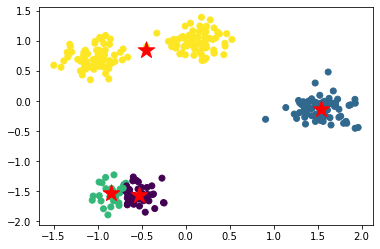

In [16]:
k = 4
# Run the K-means algorithm
centroids, clusters = k_means(data_scaled, k)


# visualize the results
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=clusters)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=300, c='r')
plt.show()

In [12]:
# Compute the total within-cluster sum of squares
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] -  
centroids[i])) for i in range(k)])
print("Total within-cluster sum of squares: &quot", wcss)

Total within-cluster sum of squares: &quot 69.89229025270971


# For K-medoid

In [18]:
def initialize_medoids(data, k):
    return data[np.random.randint(data.shape[0], size=k)]

In [19]:
def compute_dissimilarities(data, medoids):
    dissimilarities = np.zeros((data.shape[0], medoids.shape[0])) 
    for i in range(medoids.shape[0]):
        dissimilarities[:,i] = np.linalg.norm(data - medoids[i], axis=1)
    return dissimilarities

In [20]:
def update_medoids(data, clusters, k):
    medoids = np.zeros((k, data.shape[1]))
    for i in range(k):
        medoids[i] = data[clusters == i][np.argmin(np.sum(np.square(data[clusters == i] - np.mean(data[clusters == i], axis=0)), axis=1))]
    return medoids

In [21]:
def k_medoid(data, k, max_iterations=200):
    medoids = initialize_medoids(data, k)
    for i in range(max_iterations):
        old_medoids = medoids
        dissimilarities = compute_dissimilarities(data, medoids)
        clusters = assign_clusters(dissimilarities)
        medoids = update_medoids(data, clusters, k)
        if np.all(old_medoids == medoids):
            break
    return medoids, clusters

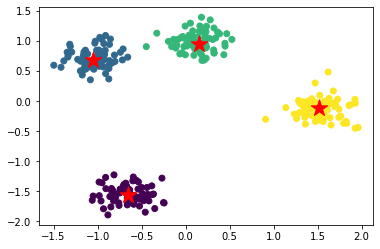

In [23]:
# call the k_medoid function
medoids, clusters = k_medoid(data_scaled, k)

#plot the results
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=clusters)
plt.scatter(medoids[:,0], medoids[:,1], marker='*', s=300, c='r')
plt.show()
